In [6]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import json

# Load games data from a .json file
def load_json_data():
    with open('../data/test_data_big.json') as f:
        data = json.loads(f.read())
        # print(data)
        return data

data = load_json_data()

In [7]:
def get_specific_data(array_to_fill, data_type, sample_size = "-1"):
    for i in data.keys():
        if(sample_size > str(len(data.keys()))):
            print(f'not enough games! (requested: {sample_size} available: {len(data.keys())})')
            return
        if(i == sample_size):
            print(f'received {sample_size} samples')
            return
        array_to_fill.append(data[i][data_type])

heatmap arr:  [[50, 40, 42, 59], [57, 55, 42, 48], [47, 51, 50, 56], [63, 53, 48, 39]]


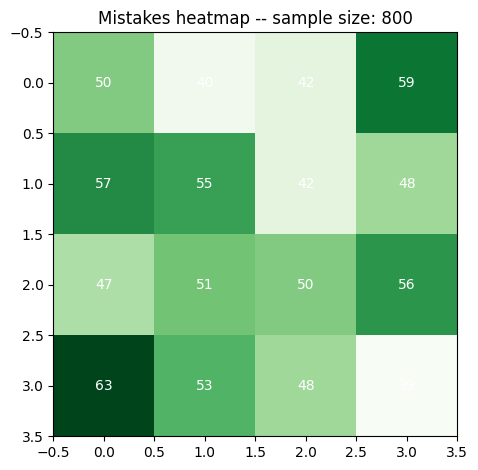

In [24]:
# Show a heatmap of mistakes of n sampled games

mistakes_data = []
game_array = [0] * 16
sample_size = 800

def mistakes_heatmap(sample_size): # Note: Sample size has to be a string (python u weird for this)
    get_specific_data(mistakes_data,'last_tile',sample_size)
    # print(mistakes_data) Big array

mistakes_heatmap(f"{sample_size}") # 20+ for decent results

for i in mistakes_data:
    game_array[i] = (game_array[i] + 1)

heatmap_arr = [game_array[i:i + 4] for i in range(0, len(game_array), 4)]
print(f'heatmap arr: ', heatmap_arr)

def display_heatmap(data_array, cbarlabel, ax=None, cbar_kw=None):
    # Generate basic plot
    fig, ax = plt.subplots()
    im = ax.imshow(data_array)

    # Loop over data and create text annotations
    for i in range(len(data_array)):
        for j in range(len(data_array)):
            text = ax.text(j, i,data_array[i][j], ha="center", va="center", color="w" )

    # Create colorbar
    if ax is None:
        ax = plt.gca()

    if cbar_kw is None:
        cbar_kw = {}
    
    # colorbar (old)
    # cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    # cbar.ax.set_ylabel(cbarlabel,rotation=-90, va="bottom")

    # Save the plot
    plt.savefig('heatmap.png',bbox_inches='tight')

    # Display the heatmap
    fig.tight_layout()
    ax.set_title(f"Mistakes heatmap -- sample size: {sample_size}")
    ax.imshow(data_array,cmap="Greens")

display_heatmap(heatmap_arr, cbarlabel="scale")